In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/content/My Uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.shape

(1156, 7)

In [5]:
df.size

8092

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [13]:
df1=df.dropna()
df1.isnull().values.any()

False

In [14]:
df.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [15]:
start= df['START*'].dropna()
un_start=set(start)
un_start

{'Apex',
 'Arabi',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'Colombo',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hudson Square',
 'Huntington Woods',
 'Ingleside',
 'Islamabad',
 'Jacksonville',
 'Jamaica',
 'Kar?chi',
 'Katunayaka',
 'Katunayake',
 'Katy',
 'Kenner',
 'Kilarney Woods',
 'Kissimmee',
 'Krendle Woods',
 'Lahore',
 'Lake Reams',
 'Lake Wellingborough',
 'Latta',
 'Lexington Park at Amberly',
 'Long Island 

In [23]:
df['START*'].value_counts()

Cary                   161
Unknown Location        55
Morrisville             54
Whitebridge             36
Durham                  30
                      ... 
Lower Manhattan          1
Mcvan                    1
Lake Wellingborough      1
Renaissance              1
Austin                   1
Name: START*, Length: 131, dtype: int64

In [18]:
len(df['START*'].unique())

131

In [22]:
df['STOP*'].value_counts()

Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
                   ... 
South Congress        1
Chapel Hill           1
Faubourg Marigny      1
Fuquay-Varina         1
Northwoods            1
Name: STOP*, Length: 137, dtype: int64

In [24]:
df[df['START*']=='Cary']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
28,1/15/2016 11:43,1/15/2016 12:03,Business,Cary,Durham,10.4,Meal/Entertain
30,1/18/2016 14:55,1/18/2016 15:06,Business,Cary,Cary,4.8,Meal/Entertain
34,1/20/2016 10:36,1/20/2016 11:11,Business,Cary,Raleigh,17.1,Meeting
...,...,...,...,...,...,...,...
1046,12/12/2016 17:51,12/12/2016 18:01,Business,Cary,Morrisville,3.0,Meal/Entertain
1048,12/13/2016 18:19,12/13/2016 18:29,Business,Cary,Cary,4.2,Errand/Supplies
1049,12/13/2016 20:20,12/13/2016 20:29,Business,Cary,Cary,4.1,Meal/Entertain
1052,12/14/2016 17:50,12/14/2016 18:00,Business,Cary,Morrisville,3.0,Meal/Entertain


In [32]:
df2=pd.DataFrame(df['START*'].value_counts())
df2=df2.reset_index()
df2=df2.rename(columns={'index':'Start Point','START*':'Count'})
df2

,Start Point,Count
0,Cary,161
1,Unknown Location,55
2,Morrisville,54
3,Whitebridge,36
4,Durham,30
...,...,...
126,Lower Manhattan,1
127,Mcvan,1
128,Lake Wellingborough,1
129,Renaissance,1


In [36]:
df3=pd.DataFrame(df['STOP*'].value_counts())
df3=df3.reset_index()
df3=df3.rename(columns={'index':'END Point','STOP*':'Count'})
df3

,END Point,Count
0,Cary,155
1,Morrisville,60
2,Unknown Location,56
3,Whitebridge,37
4,Durham,30
...,...,...
132,South Congress,1
133,Chapel Hill,1
134,Faubourg Marigny,1
135,Fuquay-Varina,1


In [53]:
df['MILES*'].groupby(df['PURPOSE*']).sum()

PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


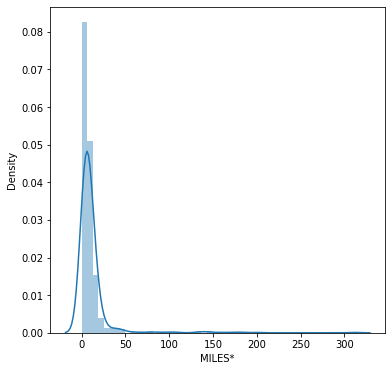

In [50]:
plt.figure(figsize=(6,6))
sns.distplot(df['MILES*'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


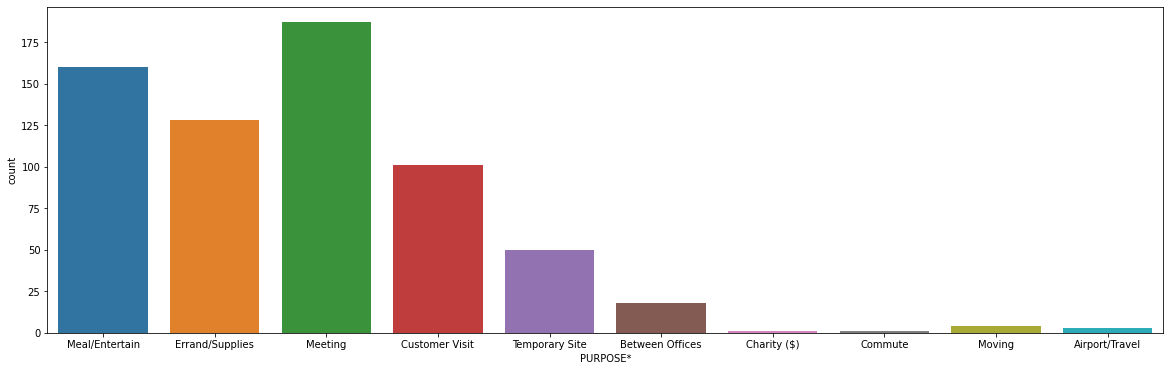

In [56]:
plt.figure(figsize=(20,6))
sns.countplot(df['PURPOSE*'])
plt.show()

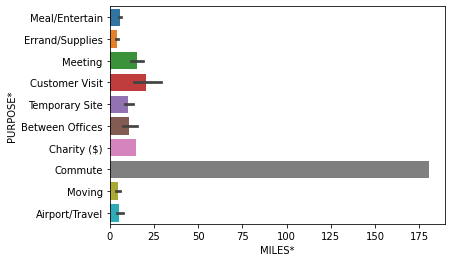

In [61]:
df=df.reset_index()
sns.barplot(x=df['MILES*'],y=df['PURPOSE*'])

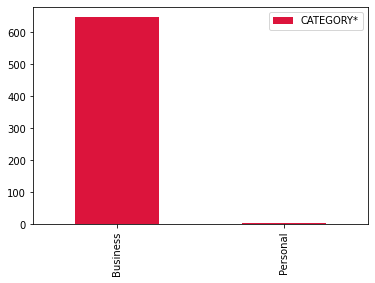

In [65]:
df5=pd.DataFrame(df['CATEGORY*'].value_counts())
df5.plot(kind='bar', color='crimson')